In [22]:
# Import the necessary libraries
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.interpolate import CubicSpline
from scipy.signal import savgol_filter
from scipy.stats import norm, lognorm
from scipy.optimize import curve_fit

In [6]:
# Define a function to fetch and display options data
def fetch_options_data(ticker):
    # Get the ticker object
    stock = yf.Ticker(ticker)

    # Get current stock price
    S0 = stock.history(period='1d')['Close'].iloc[0]
    
    # Get options expiration dates
    exp_dates = stock.options

    print(exp_dates)
    
    # Find the expiration date approximately three months from now
    today = datetime.today()
    three_months_later = today + timedelta(days=90)
    
    # Select the expiration date closest to three months from now
    selected_exp_date = min(exp_dates, key=lambda date: abs(datetime.strptime(date, '%Y-%m-%d') - three_months_later))
    
    # Fetch the option chain for the selected expiration date
    option_chain = stock.option_chain(selected_exp_date)
    
    # Extract call options data
    calls = option_chain.calls
    
    # Extract relevant data
    strike_prices = calls['strike']
    implied_vols = calls['impliedVolatility']
    last_trade_date = calls['lastTradeDate']
    last_price = calls['lastPrice']
    bid = calls['bid']
    ask = calls['ask']
    change = calls['change']
    percent_change = calls['percentChange']
    volume = calls['volume']
    open_interest = calls['openInterest']


    # Create a DataFrame to display the data
    options_data = pd.DataFrame({
        'Last Trade Date': last_trade_date,
        'Strike Price': strike_prices,
        'Last Price': last_price,
        'Bid': bid,
        'Ask': ask,
        'Change': change,
        '% Change': percent_change,
        'Volume': volume,
        'Open Interest': open_interest,
        'Implied Volatility': implied_vols
    })
    
    options_data = options_data[options_data['Implied Volatility'] > 0.1]

    # Display the results in a table
    print(f"Selected Expiration Date: {selected_exp_date}")
    display(options_data)

    return S0, options_data['Strike Price'].values, options_data['Implied Volatility'].values, selected_exp_date

S0, strike_prices, implied_vols, exp_date = fetch_options_data('AAPL')

('2024-07-26', '2024-08-02', '2024-08-09', '2024-08-16', '2024-08-23', '2024-08-30', '2024-09-20', '2024-10-18', '2024-11-15', '2024-12-20', '2025-01-17', '2025-03-21', '2025-06-20', '2025-09-19', '2025-12-19', '2026-01-16', '2026-06-18', '2026-12-18')
Selected Expiration Date: 2024-10-18


,Last Trade Date,Strike Price,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,2024-07-12 15:00:37+00:00,5.0,226.87,217.70,220.25,0.000000,0.000000,10.0,16,2.593754
1,2024-07-01 17:27:39+00:00,40.0,177.75,183.10,185.50,0.000000,0.000000,NaN,40,1.593752
3,2024-07-10 16:23:20+00:00,60.0,172.50,163.40,165.75,0.000000,0.000000,1.0,3,1.338870
6,2024-07-16 15:56:55+00:00,90.0,145.18,133.80,136.20,0.000000,0.000000,1.0,9,1.038091
8,2024-07-18 16:27:45+00:00,100.0,124.75,123.95,126.35,0.000000,0.000000,1.0,40,0.953370
9,2024-06-24 18:31:17+00:00,105.0,105.84,118.95,121.50,0.000000,0.000000,1.0,13,0.912599
11,2024-07-02 13:35:47+00:00,115.0,102.72,109.10,111.65,0.000000,0.000000,1.0,34,0.834474
12,2024-07-18 19:58:19+00:00,120.0,105.76,104.30,106.65,0.000000,0.000000,10.0,101,0.799563
13,2024-07-12 15:00:37+00:00,125.0,108.61,99.30,101.80,0.000000,0.000000,20.0,145,0.762454
14,2024-07-18 15:15:54+00:00,130.0,96.86,94.80,96.45,0.000000,0.000000,4.0,511,0.726077


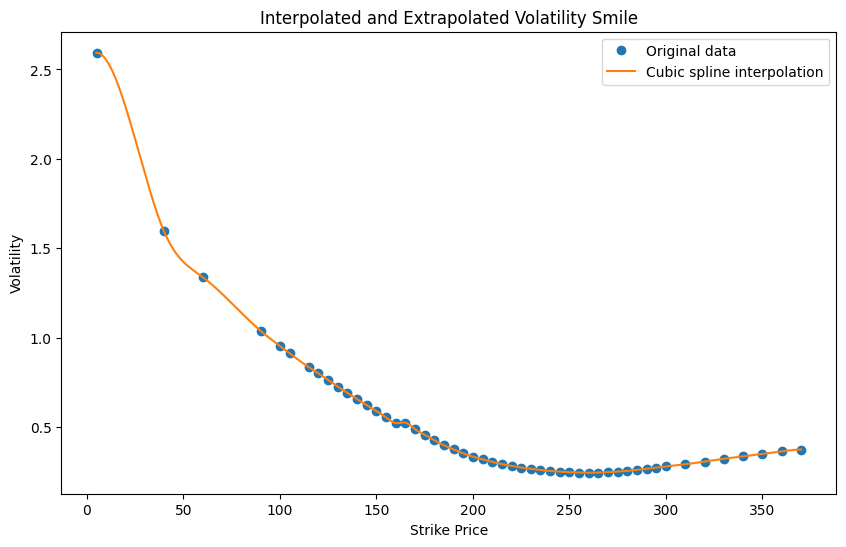

In [7]:
# Define the function for cubic spline interpolation
def interpolate(strikes, ivols):
    spline_fit = CubicSpline(strikes, ivols, bc_type='clamped')
    # Generate new strike prices for interpolation
    new_strikes = np.linspace(min(strikes), max(strikes), 2000)
    new_ivols = spline_fit(new_strikes)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(strikes, ivols, 'o', label='Original data')
    plt.plot(new_strikes, new_ivols, label='Cubic spline interpolation')
    plt.xlabel('Strike Price')
    plt.ylabel('Volatility')
    plt.title('Interpolated and Extrapolated Volatility Smile')
    plt.legend()
    plt.show()

    return new_strikes, new_ivols

# Interpolate volatilities
new_strikes, new_ivols = interpolate(strike_prices, implied_vols)


In [9]:
def black_scholes_call(S0, X, T, r, sigma):
    d1 = (np.log(S0 / X) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = (S0 * norm.cdf(d1)) - (X * np.exp(-r * T) * norm.cdf(d2))
    return call_price

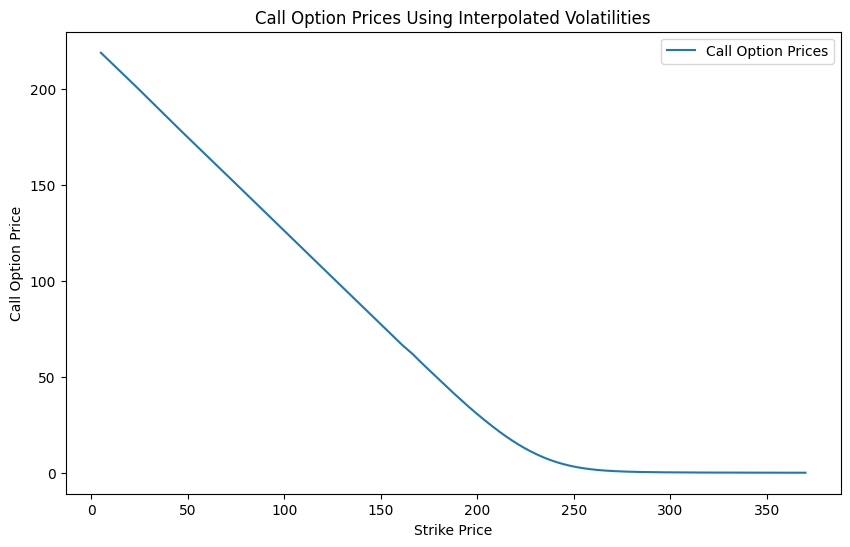

In [14]:
# Define the function to calculate and plot call option prices
def call_valuation(S0, T, r, new_strikes, new_ivols):
    call_prices = [black_scholes_call(S0, K, T, r, sigma) for K, sigma in zip(new_strikes, new_ivols)]
    # Plot the call option prices
    plt.figure(figsize=(10, 6))
    plt.plot(new_strikes, call_prices, label='Call Option Prices')
    plt.xlabel('Strike Price')
    plt.ylabel('Call Option Price')
    plt.title('Call Option Prices Using Interpolated Volatilities')
    plt.legend()
    plt.show()
    return call_prices

# Example parameters for Black-Scholes calculation
T = (datetime.strptime(exp_date, '%Y-%m-%d') - datetime.today()).days / 365.25  # Time to maturity in years
r = 0.05  # Risk-free interest rate (5%)

# Calculate call option prices
call_prices = call_valuation(S0, T, r, new_strikes, new_ivols)

Fitted parameters for log-normal distribution:
Shape (s): 0.00017132091238389284
Location (loc): -416.67931739306357
Scale (scale): 417.29790538471894


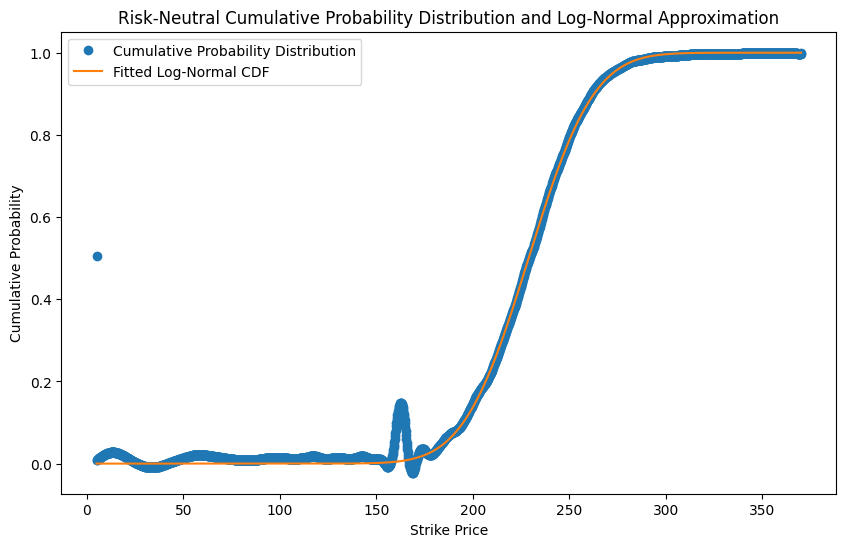

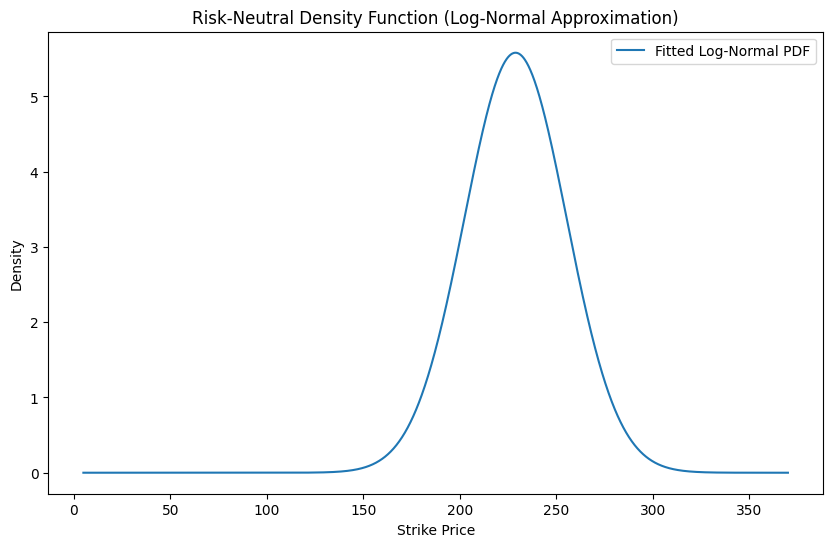

In [26]:
# Define the step size
delta = new_strikes[1] - new_strikes[0]

# Calculate the cumulative probability distribution \(\tilde{\Pi}_t(X)\)
def cumulative_probability(call_prices, strikes, delta, r, T):
    exp_rtT = np.exp(r * T)
    cumulative_prob = 1 + exp_rtT / delta * (np.roll(call_prices, -1) - np.roll(call_prices, 1)) / 2
    cumulative_prob[0] = 1 + exp_rtT / delta * (call_prices[1] - call_prices[0]) / 2
    cumulative_prob[-1] = 1 + exp_rtT / delta * (call_prices[-1] - call_prices[-2]) / 2
    return cumulative_prob

# Calculate cumulative probability function
cumulative_prob = cumulative_probability(call_prices, new_strikes, delta, r, T)

# Scale strike prices for better optimization
scaled_strikes = new_strikes / np.max(new_strikes)

# Fit log-normal CDF to the cumulative probability distribution
def lognormal_cdf(x, s, loc, scale):
    return lognorm.cdf(x, s, loc, scale)

# Improved initial guess for parameters: shape, loc, scale
initial_guess = [0.1, 0, 1]
popt, pcov = curve_fit(lognormal_cdf, scaled_strikes, cumulative_prob, p0=initial_guess, maxfev=4000)

# Print fitted parameters
print("Fitted parameters for log-normal distribution:")
print(f"Shape (s): {popt[0]}")
print(f"Location (loc): {popt[1]}")
print(f"Scale (scale): {popt[2]}")

# Define the log-normal PDF function
def lognormal_pdf(x, s, loc, scale):
    return lognorm.pdf(x, s, loc, scale)

# Plot the calculated cumulative probability distribution and the fitted log-normal CDF
plt.figure(figsize=(10, 6))
plt.plot(new_strikes, cumulative_prob, 'o', label='Cumulative Probability Distribution')
plt.plot(new_strikes, lognormal_cdf(scaled_strikes, *popt), '-', label='Fitted Log-Normal CDF')
plt.xlabel('Strike Price')
plt.ylabel('Cumulative Probability')
plt.title('Risk-Neutral Cumulative Probability Distribution and Log-Normal Approximation')
plt.legend()
plt.show()

# Calculate the PDF from the fitted log-normal parameters
pdf_values = lognormal_pdf(scaled_strikes, *popt)

# Plot the fitted log-normal PDF
plt.figure(figsize=(10, 6))
plt.plot(new_strikes, pdf_values, '-', label='Fitted Log-Normal PDF')
plt.xlabel('Strike Price')
plt.ylabel('Density')
plt.title('Risk-Neutral Density Function (Log-Normal Approximation)')
plt.legend()
plt.show()